# basic test for brib using multi precision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

import flamp
import gmpy2
flamp.set_dps(32)
realmp_to_dp = np.vectorize(float)

In [11]:
n = 40
tolequi=1e-6
tol=1e-20
w, estinfo = rexpi.west(n, tol)

# define initial nodes in multi precision to run algorithm in multi precision
xi = w/(n+1)/np.pi
cheb_nodes_pos = flamp.cos((flamp.to_mp(2*np.arange(n-1,-1,-1)+1.))/2/(2*n+1)*gmpy2.const_pi())
nodes_pos = (1-xi)*cheb_nodes_pos + xi*np.arange(1,n+1)*(flamp.to_mp(1.0)/(n+1))

print("use n = %d and w = %f. computed for error objective epsilon = %.2e"%(n,w,tol))

use n = 256 and w = 712.304692. computed for error objective epsilon = 1.00e-20


In [3]:
r, info = rexpi.brib(w,n,tolequi=tolequi,nodes_pos=nodes_pos,npi = -30)
success, accuracy, [nodes_pos, equnodes], allerr, tracknodes, nodesphis, timings = info
niter = len(allerr)
errors = [float(e[0]) for e in allerr]
deviations = [float(e[1]) for e in allerr]

print("used %d iterations, error = %.2e, deviation = %.2e"%(niter,errors[-1],deviations[-1]))

used 12 iterations, error = 8.42e-21, deviation = 7.28e-09


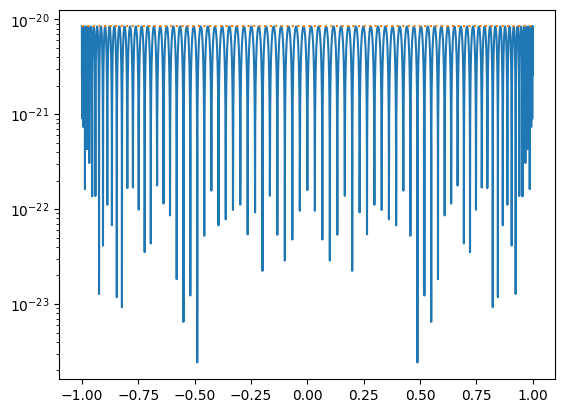

In [4]:
xs = flamp.linspace(-1,1,5000)
err = r(1j*xs)-flamp.exp(1j*w*xs)
errmax = np.max(abs(err))
plt.semilogy(xs,abs(err),[-1,1],[errmax,errmax],':');

[0.12619476+1.32181946j 0.12619476-1.32181946j 0.20655307+1.24800465j
 0.20655307-1.24800465j 0.26363559+1.18069257j 0.26363559-1.18069257j
 0.30783291+1.11560633j 0.30783291-1.11560633j 0.34336104+1.05123863j
 0.34336104-1.05123863j 0.37251705+0.98689476j 0.37251705-0.98689476j
 0.39674947+0.92222102j 0.4170539 +0.85703577j 0.39674947-0.92222102j
 0.43415309+0.79125405j 0.4170539 -0.85703577j 0.44859085+0.72484884j
 0.43415309-0.79125405j 0.46078629+0.65782909j 0.44859085-0.72484884j
 0.47106753+0.59022643j 0.46078629-0.65782909j 0.47969388+0.52208674j
 0.47106753-0.59022643j 0.48687119+0.45346475j 0.47969388-0.52208674j
 0.49276275+0.38442048j 0.48687119-0.45346475j 0.49749724+0.31501698j
 0.49276275-0.38442048j 0.50117459+0.24531888j 0.49749724-0.31501698j
 0.50387025+0.17539149j 0.50117459-0.24531888j 0.50563835+0.10530036j
 0.50387025-0.17539149j 0.50651383+0.03511103j 0.50563835-0.10530036j
 0.50651383-0.03511103j]


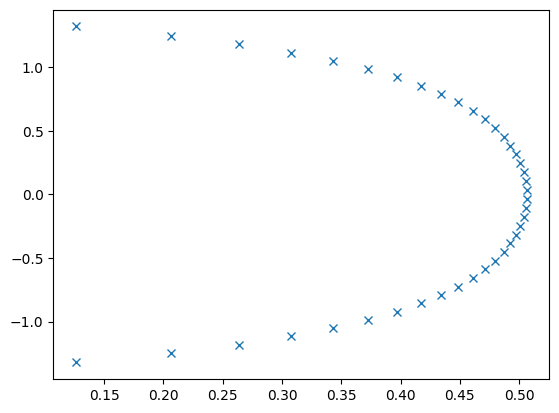

In [7]:
sj = r.getpoles(sym=True)
sj_dp = np.array([float(pole.real) + 1j*float(pole.imag) for pole in sj])
plt.plot(sj_dp.real,sj_dp.imag,'x')
print(sj_dp)